In [69]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sps

In [70]:
# read the data
df = pd.read_csv('../data/all_movies_with_twitter_and_ratings.csv')

In [71]:
# Fix the entry for the movie "12 Strongs" -- the data collection script failed
# and we didn't want to re-run for one Movie. We just looked it up.
df.loc[df['movie_title']=='12 Strongs','critics_rating'] = 54
df.loc[df['movie_title']=='12 Strongs','audience_rating'] = 64

# a bit more data cleaninng -- throw out movies without rating
# or with -1 rating (there are only a few)
df = df[ df['critics_rating'] > -0.5 ]
df = df[ df['audience_rating'] > -0.5 ]

# throw out movies that have less than 2000 theaters
df.loc[:,'opening_theater_count'] = df.loc[:,'opening_theater_count'].apply(lambda x: int(x.replace(',','') \
                                                                if type(x) is str else -1))
df = df[ df['opening_theater_count'] >= 2000]


print(f"We've got {len(df)} good movie entries with ratings!")

We've got 197 good movie entries with ratings!


In [72]:
# More data prep, convert data types

# Make a float out of opening weekend box office
df.loc[:,['opening_weekend_gross']] = \
     df['opening_weekend_gross'].apply(lambda x: float( x.replace('$','').replace(',','') )\
                                       if type(x) is str else -1.0)
    
# df = df[ df['opening_weekend_gross'] < 40.0e6]


In [73]:
df.head(5)

,row,rank,movie_title,studio,total_gross,total_theater,opening_weekend_gross,opening_theater_count,release_date,close_date,twitter1,twitter2,twitter3,twitter4,twitter5,RT_title,critics_rating,audience_rating
1,1,57,Mission: Impossible - Fallout,Par.,"$77,526,635","4,386",61236534.0,4386,7/27/18,-,MissionImpossible,MissionImpossibleFallout,NaN,NaN,NaN,Mission_Impossible_Fallout,97,92
2,2,84,Teen Titans Go! To The Movies,WB,"$13,640,501","3,188",10411189.0,3188,7/27/18,-,TeenTitansGOMovie,NaN,NaN,NaN,NaN,Teen_Titans_Go_To_The_Movies,90,72
4,4,22,Mamma Mia! Here We Go Again,Uni.,"$60,227,525","3,514",34952180.0,3317,7/20/18,-,MammaMia2,NaN,NaN,NaN,NaN,Mamma_Mia_Here_We_Go_Again,79,76
5,5,28,The Equalizer 2,Sony,"$54,241,345","3,388",36011640.0,3388,7/20/18,-,TheEqualizer2,NaN,NaN,NaN,NaN,The_Equalizer_2,50,74
7,7,12,Hotel Transylvania 3: Summer Vacation,Sony,"$110,628,501","4,267",44076225.0,4267,7/13/18,-,HotelT3,NaN,NaN,NaN,NaN,Hotel_Transylvania_3_Summer_Vacation,62,52


In [74]:
# plotting, set some defaults
from matplotlib import rcParams
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 2

rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['legend.fontsize'] = 20
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2


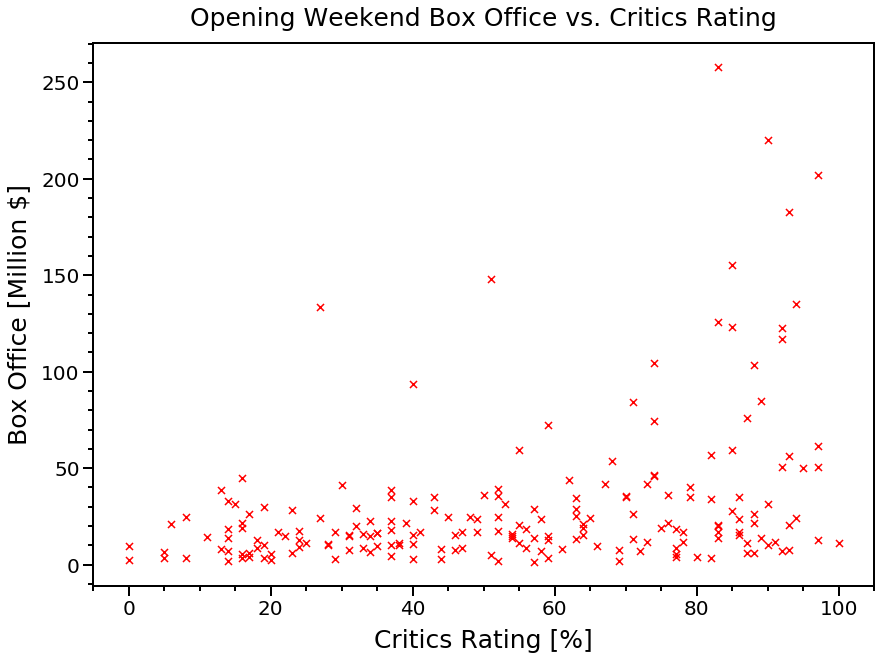

In [75]:
xfig = plt.figure(figsize=(14,10))
yy = df['opening_weekend_gross'] / 1.0e6
xx = df['critics_rating']
plt.scatter(xx,yy,marker='x',color='r',s=50)
plt.xlabel('Critics Rating [%]',labelpad=10,fontsize=25)
plt.ylabel('Box Office [Million $]',labelpad=10,fontsize=25)
ax = plt.gca()
yformatter = plt.FormatStrFormatter("%.0f")
ax.yaxis.set_major_formatter(yformatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.title('Opening Weekend Box Office vs. Critics Rating',fontsize=25,y=1.02)
plt.savefig('../plots/box_office_vs_critics_linear.png',dpi=200)

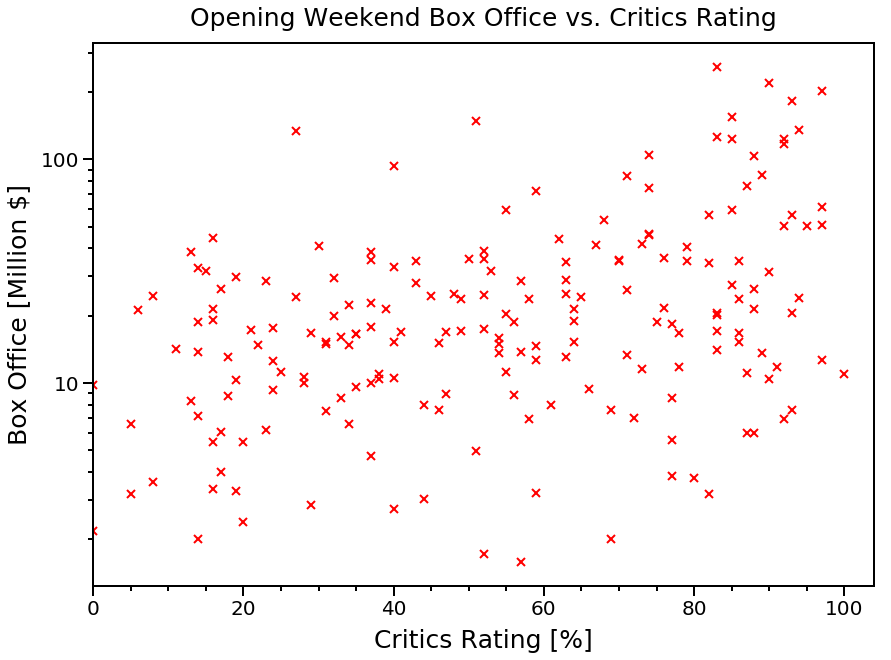

In [76]:
xfig = plt.figure(figsize=(14,10))
yy = df['opening_weekend_gross'] / 1.0e6
xx = df['critics_rating']
plt.semilogy(xx,yy,marker='x',color='r',lw=0,markersize=8,markeredgewidth=2)
plt.xlabel('Critics Rating [%]',labelpad=10,fontsize=25)
plt.ylabel('Box Office [Million $]',labelpad=10,fontsize=25)
ax = plt.gca()
yformatter = plt.FormatStrFormatter("%.0f")
ax.yaxis.set_major_formatter(yformatter)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.xlim(0,104)
plt.title('Opening Weekend Box Office vs. Critics Rating',fontsize=25,y=1.02)
plt.savefig('../plots/box_office_vs_critics_linlog.png',dpi=200)

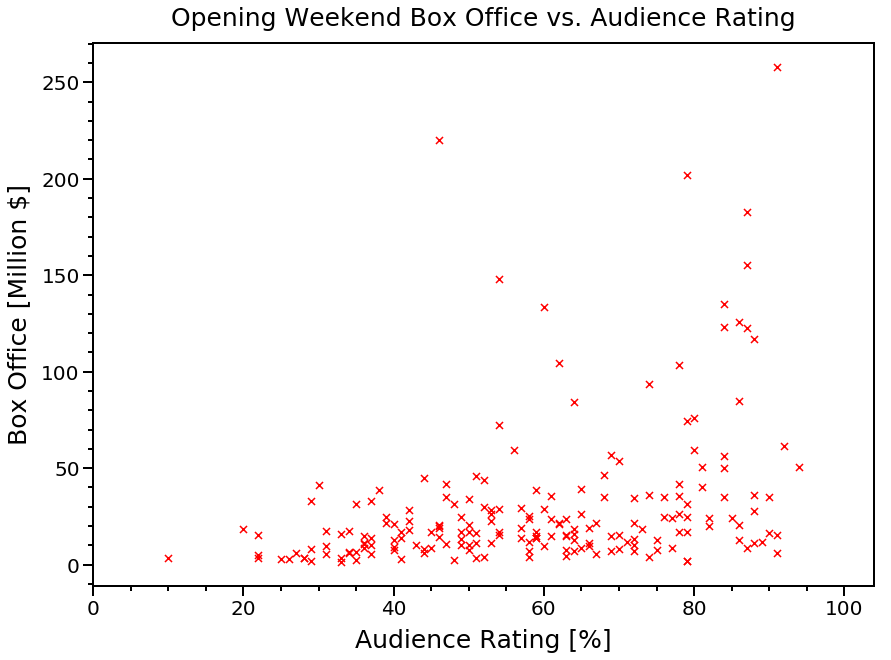

In [77]:
xfig = plt.figure(figsize=(14,10))
yy = df['opening_weekend_gross'] / 1.0e6
xx = df['audience_rating']
plt.scatter(xx,yy,marker='x',color='r',s=50)
plt.xlabel('Audience Rating [%]',labelpad=10,fontsize=25)
plt.ylabel('Box Office [Million $]',labelpad=10,fontsize=25)
ax = plt.gca()
yformatter = plt.FormatStrFormatter("%.0f")
ax.yaxis.set_major_formatter(yformatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.xlim(0,104)
plt.title('Opening Weekend Box Office vs. Audience Rating',fontsize=25,y=1.02)
plt.savefig('../plots/box_office_vs_audience_linear.png',dpi=200)

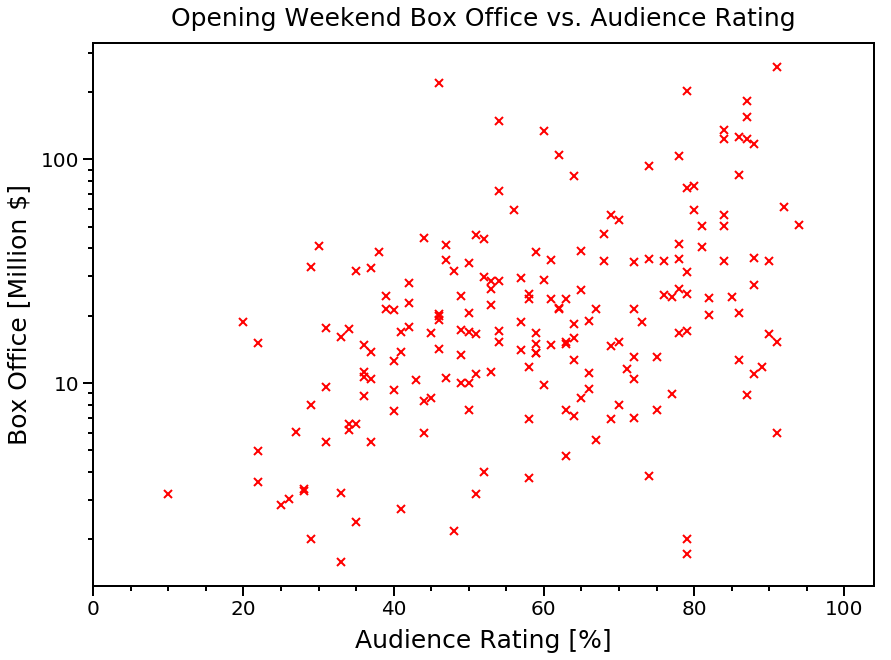

In [78]:
xfig = plt.figure(figsize=(14,10))
yy = df['opening_weekend_gross'] / 1.0e6
xx = df['audience_rating']
plt.semilogy(xx,yy,marker='x',color='r',lw=0,markersize=8,markeredgewidth=2)
plt.xlabel('Audience Rating [%]',labelpad=10,fontsize=25)
plt.ylabel('Box Office [Million $]',labelpad=10,fontsize=25)
ax = plt.gca()
yformatter = plt.FormatStrFormatter("%.0f")
ax.yaxis.set_major_formatter(yformatter)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.xlim(0,104)
plt.title('Opening Weekend Box Office vs. Audience Rating',fontsize=25,y=1.02)
plt.savefig('../plots/box_office_vs_audience_linlog.png',dpi=200)

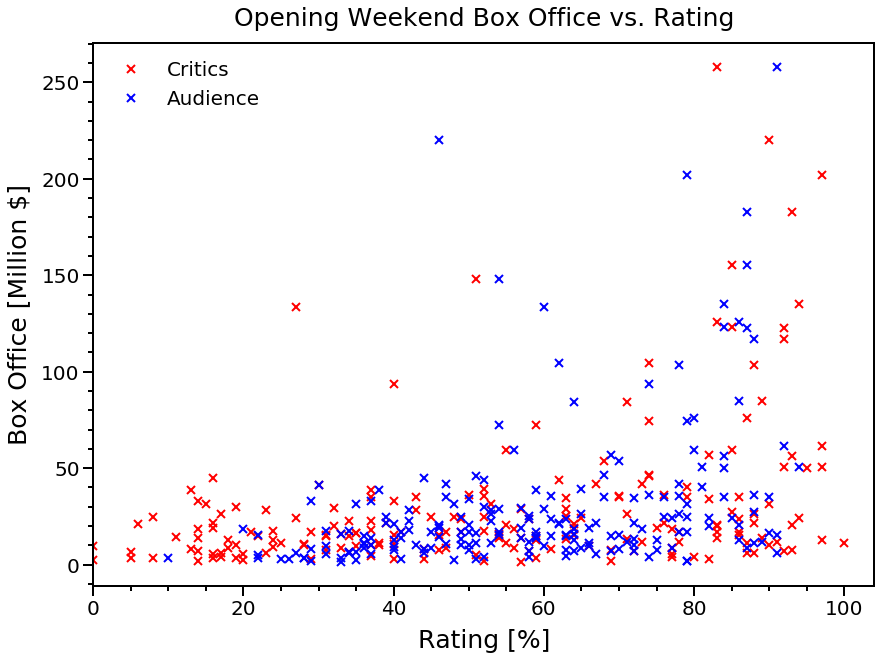

In [79]:
xfig = plt.figure(figsize=(14,10))
yy = df['opening_weekend_gross'] / 1.0e6
xx_aud = df['audience_rating']
xx_crit = df['critics_rating']
plt.plot(xx_crit,yy,marker='x',color='r',lw=0,markersize=8,markeredgewidth=2,label='Critics')
plt.plot(xx_aud,yy,marker='x',color='b',lw=0,markersize=8,markeredgewidth=2,label='Audience')
plt.xlabel('Rating [%]',labelpad=10,fontsize=25)
plt.ylabel('Box Office [Million $]',labelpad=10,fontsize=25)
ax = plt.gca()
yformatter = plt.FormatStrFormatter("%.0f")
ax.yaxis.set_major_formatter(yformatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.xlim(0,104)
plt.title('Opening Weekend Box Office vs. Rating',fontsize=25,y=1.02)
plt.legend(frameon=False)
plt.savefig('../plots/box_office_vs_rating_linear.png',dpi=200)

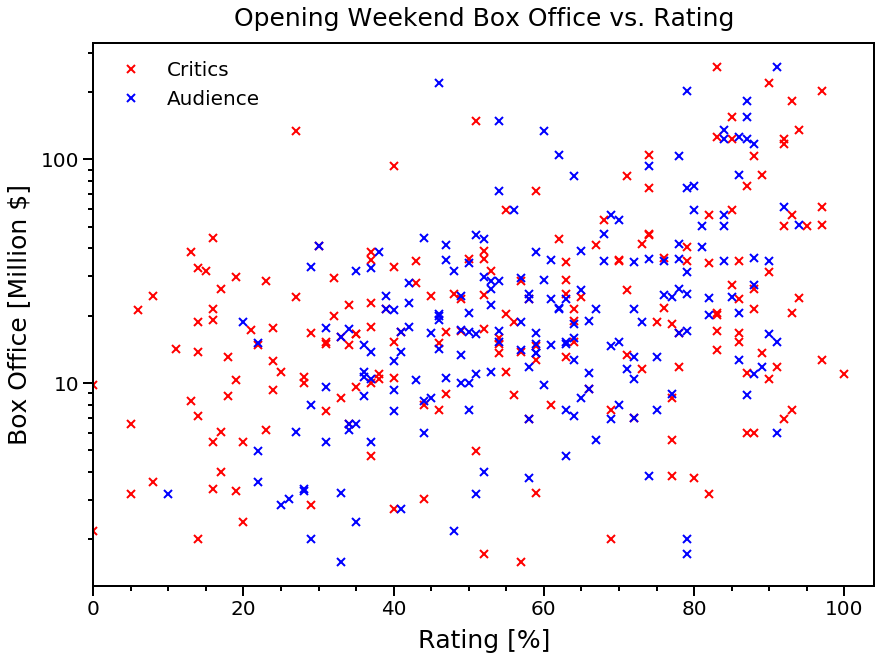

In [80]:
xfig = plt.figure(figsize=(14,10))
yy = df['opening_weekend_gross'] / 1.0e6
xx_aud = df['audience_rating']
xx_crit = df['critics_rating']
plt.semilogy(xx_crit,yy,marker='x',color='r',lw=0,markersize=8,markeredgewidth=2,label='Critics')
plt.semilogy(xx_aud,yy,marker='x',color='b',lw=0,markersize=8,markeredgewidth=2,label='Audience')
plt.xlabel('Rating [%]',labelpad=10,fontsize=25)
plt.ylabel('Box Office [Million $]',labelpad=10,fontsize=25)
ax = plt.gca()
yformatter = plt.FormatStrFormatter("%.0f")
ax.yaxis.set_major_formatter(yformatter)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.xlim(0,104)
plt.title('Opening Weekend Box Office vs. Rating',fontsize=25,y=1.02)
plt.legend(frameon=False)
plt.savefig('../plots/box_office_vs_rating_linlog.png',dpi=200)

# Hypothesis Testing

We are interested to see if there is a correlation between the critics (or audience) rating and the box office gross. we use Pearson's r sample correlation test.

We compute $r$ for samples of two variables $x_i$ and $y_i$:

$$ r= \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2}  \sqrt{\sum_i (y_i - \bar{y})^2}} $$


In [81]:
yy = df['opening_weekend_gross'] / 1.0e8
xx = df['audience_rating']
aud_R,aud_pvalue = sps.pearsonr(xx,yy)

xx = df['critics_rating']
crit_R,crit_pvalue = sps.pearsonr(xx,yy)

In [82]:
print(f"Critics: R = {crit_R:.4f}, p = {crit_pvalue:9.6E}" )
print(f"Audience: R = {aud_R:.4f}, p = {aud_pvalue:9.6E}" )

Critics: R = 0.3630, p = 1.585174E-07
Audience: R = 0.3657, p = 1.263158E-07


Based on our Pearson's R analysis, there is a weak linear relationship between ratings and box office gross. The null hypothesis that there is no relationship is highly improbable.